## 1.numpy 함수 - dot, matmul

**dot, matmul 연산은 두 배열의 행과 열에 대한 곱의 합을 구하는 함수이다**
- a는 앞, b는 뒤에 위치한 배열일때
- a의 axis -1과 b의 axis -2의 각 요소 곱의 합을 구하는 것
- a의 axis -1과 b의 axis -2의 요소 수가 같아야 함
- b가 1-D인 경우 b의 axis -1의 요소가 곱의 대상이 됨

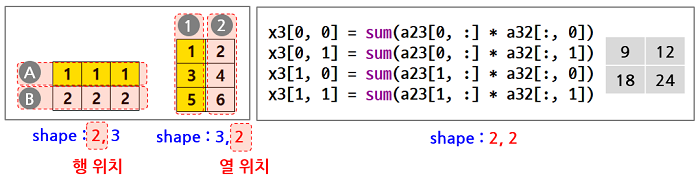

In [ ]:
# [70-1] 배열 준비
import numpy as np

a = np.array([[1, 1, 1],
              [2, 2, 2]])
b = np.array([[1,2],
              [3,4],
              [5,6]])
print(a.shape, b.shape)

(2, 3) (3, 2)


In [ ]:
# [70-2] matmul, dot 연산 수행
c = np.matmul(a,b)
d = a.dot(b)
print(c, d, sep='\n')

[[ 9 12]
 [18 24]]
[[ 9 12]
 [18 24]]


### 1) matmul, dot의 같은 동작
- a, b 모두 1-D, a, b 모두 2-D, a는 1-D, b는 N-D, a는 N-D, b는 1-D
- 이경우 matmul함수 또는 @연산자로 사용하는 것이 권장됨

**- np.matmul(a, b), a @ b**
- https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
  - a와 b의 'Matrix product'을 구해 반환, a, b : **스칼라 사용할 수 없음**
  - a가 ndarray인 경우 @ 연산자를 사용할 수 있음

**- np.dot(a, b), a.dot(b)**
- https://numpy.org/doc/stable/reference/generated/numpy.dot.html
  - a와 b의 'Dot(Inner) product'을 구해 반환, a, b : **스칼라 사용할 수 있음**
  - 많은 경우 matmul과 동일한 동작

In [ ]:
# [71-1] a, b 모두 1-D
# c = sum(a * b), c = scalar

a = np.array([1, 2, 3])
b = np.array([1, 2, 3])

c = np.matmul(a, b)
d = np.dot(a, b)
print(c, d, sep='\n')
print(c.shape)

14
14
()


In [ ]:
# [71-2] a, b 모두 2-D
# c = sum(a[i, :] * b[:, n]), c.shape = (i, n)

a = np.array([[1, 2],
              [3, 4],
              [5, 6]])
b = np.array([[1, 2],
              [3, 4]])
# (3, 2)  (2, 2) => (3, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(3, 2) (2, 2) (3, 2)
[[ 7 10]
 [15 22]
 [23 34]]
[[ 7 10]
 [15 22]
 [23 34]]


In [ ]:
# [71-3] a 1-D, b N-D
# c = sum(a[:] * b[n, : , m]), c.shape = (n, m)
a = np.array([1,2,3])
b = np.array([[[1,2],
               [2,3],
               [3,4]]])
# (3, )  (1, 3, 2) => (1, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(3,) (1, 3, 2) (1, 2)
[[14 20]]
[[14 20]]


In [ ]:
# [71-4] a 1-D, b N-D
# c = sum(a[:] * b[n, : , m]), c.shape = (n, m)
a = np.array([1,2,3])
b = np.array([[1,2],
              [2,3],
              [3,4]])
# (3, )  (3, 2) => (2,)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(3,) (3, 2) (2,)
[14 20]
[14 20]


In [ ]:
# [71-5] a N-D, b 1-D
# c = sum(a[i, j, :] * b[:]), c.shape = (i, j)
a = np.array([[[1,2,3],
               [4,5,6]],
              [[1,1,1],
               [2,2,2]]])
b = np.array([1,2,3])
# (2, 2, 3)  (3,) => (2, 2)
c = np.matmul(a, b)
d = np.dot(a, b)
print(a.shape, b.shape, c.shape)
print(c, d, sep='\n')

(2, 2, 3) (3,) (2, 2)
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]


#### 다음 두 배열의 matmul, dot 연산의 결과 shape를 예측하여 적어 보자
- (2, 2, 3) (3, )
- (2, 3) (3, 2)
- (2, 3) (3, )
- (3, ) (3, 1)
- dot 만 가능 : (3, 2)  2 (Scalar) => (3, 2)

In [ ]:
# [72-1] 배열 준비
import numpy as np
a223 = np.array([[[1,2,3],[4,5,6]],[[1,1,1],[2,2,2]]])
a32 = np.array([[1,2],[3,4],[5,6]])
a31 = np.array([[1],[2],[3]])
a23 = np.array([[1,1,1],[2,2,2]])
a03 = np.array([1,2,3])

In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [ ]:
# [72-2] dot, matmul 연산
x1=np.dot(a223, a03)
x2=np.matmul(a223, a03)
printary(a223, a03, x1, x2)

[[[1 2 3]
  [4 5 6]]

 [[1 1 1]
  [2 2 2]]]
[1 2 3]
[[14 32]
 [ 6 12]]
[[14 32]
 [ 6 12]]
------------------------------


In [ ]:
# [72-3] dot, matmul 연산
x1=np.dot(a23, a32)
x2=np.matmul(a23, a32)
printary(a23, a32, x1, x2)

[[1 1 1]
 [2 2 2]]
[[1 2]
 [3 4]
 [5 6]]
[[ 9 12]
 [18 24]]
[[ 9 12]
 [18 24]]
------------------------------


In [ ]:
# [72-4] dot, matmul 연산
x1=np.dot(a23, a03)
x2=np.matmul(a23, a03)
printary(a23, a03, x1, x2)

[[1 1 1]
 [2 2 2]]
[1 2 3]
[ 6 12]
[ 6 12]
------------------------------


In [ ]:
# [72-5] dot, matmul 연산
x1=np.dot(a03, a31)
x2=np.matmul(a03, a31)
printary(a03, a31, x1, x2)

[1 2 3]
[[1]
 [2]
 [3]]
[14]
[14]
------------------------------


### 2) matmul, dot의 다른 동작
  - a, b 모두 1-D, a, b 모두 2-D, a는 1-D, b는 N-D, a는 N-D, b는 1-D는 동일 동작
  - 위의 경우가 아니라면 결과 배열의 shape이 다를 수 있음
      - 새로운 배열에서 계산한 값이 들어가는 위치가 다름
  - a, b 중 한 쪽이 스칼라
      - dot는 가능 matmul은 불가능

### 2-1) 3차원이상을 포함한 배열의 matmul 연산
- 대응하는 열/행을 제외한 나머지 배열에서의 원래 index 위치를 유지한다
   - (**2**, ***2***, 3)  (**2**, 3, ***3***) => (**2**, ***2***, ***3***)
   - (**2**, ***2***, 3)  (**3**, 3, ***3***) => 불능
   - (**2**, 3 )  (**3**, 3, **2**) => **(3, 2, 2)**
- 뒤 배열은 앞 배열과 '행'전까지의 요소 개수가 같아야 한다 (앞 배열의 차원이 더 높거나 같은 경우)
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다



### 2-2) 3차원 이상을 포함한 배열의 dot 연산
- 대응하는 열/행을 삭제하고 앞 배열에서 뒤 배열 쪽으로 남은 index를 나열한다
   - (**2**, ***2***, 3)  (**2**, 3, ***3***) => (**2**, **2**, ***2***, ***3***)
   - (**2**, ***2***, 3)  (**3**, 3, ***3***) => (2, 2, 3, 3)
   - (**2**, 3) (**3**, 3, **2**) => **(2, 3, 2)**
- 앞 배열의 열과 뒤 배열의 행의 수가 같은 경우 연산이 가능하다


In [ ]:
a23 = np.array([[1,1,1],
                [2,2,2]])

a332 = np.array([[[1,2],
                  [3,4],
                  [5,6]],
                 [[1,1],
                  [1,2],
                  [2,2]],
                 [[1,2],
                  [1,3],
                  [1,4]]])
r = a23[1, :]     # [2,2,2]
c = a332[0, :, 0] # [1,3,5] => 18
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a23, a332)
x2 = np.dot(a23, a332)
# (2, 3)  (3, 3, 2)
# matmul : (3, 2, 2)  [0, 1, 0] => 18
# dot    : (2, 3, 2)  [1, 0, 0] => 18
print(x1, x2, sep='\n\n\n')


In [ ]:
a223 = np.array([[[1,1,1],
                  [2,3,4]],
                 [[3,2,1],
                  [1,2,3]]])

a233 = np.array([[[1,2,1],
                  [3,4,2],
                  [5,7,6]],
                 [[1,1,1],
                  [1,2,2],
                  [2,2,2]]])

r = a223[0, 1, :]  #[2,3,4]
c = a233[0, :, 0]  #[1,3,5] => 2 + 9 + 20 = 31
# matmul [0, 1, 0]
# dot [0, 1, 0, 0]
print(r, c, sum(r*c), sep='\n')
print('-' * 30)

x1 = np.matmul(a223, a233)
x2 = np.dot(a223, a233)
# (2, 2, 3)  (2, 3, 3)
# matmul : (2, 2, 3)
# dot : (2, 2, 2, 3)
print(x1, x2, sep='\n\n\n')


다음 두 배열의 matmul 연산에 대한 결과 shape는?
- (**2, 2**, 3) (2, 3, **3**) => (2, 2, 3)
- (**2**, 2, 3) (**3**, 3, 2) => 불능(axis=0의 크기가 다름)
- (2, 2, 3) (3, 3) => (2, 2, 3)
- (2, 2, 3) (3, 1)
- (2, 3) (3, 3, 2)


다음 두 배열의 dot 연산에 대한 결과 shape는?
- (**2, 2**, 3) (**2**, 3, **3**) => (2, 2, 2, 3)
- (**2, 2**, 3) (**3**, 3, **2**) => (2, 2, 3, 2)
- (2, 2, 3) (3, 3) => (2, 2, 3)
- (2, 2, 3) (3, 1)
- (2, 3) (3, 3, 2)


In [ ]:
import numpy as np

a223 = np.array([[[1,2,3],[4,5,6]],[[1,1,1],[2,2,2]]])
a332 = np.array([[[1,2],[4,5],[7,8]],[[1,1],[2,2],[3,3]],[[1,1],[2,2],[3,3]]])
a233 = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[1,1,1],[2,2,2],[3,3,3]]])
a32 = np.array([[1,2],[3,4],[5,6]])
a33 = np.array([[1,2,3],[3,4,6],[5,6,7]])
a31 = np.array([[1],[2],[3]])

def printary(*a):
    for x in a:
        print(x.shape, x.tolist(), sep='\n')
    print("-" * 30)


In [ ]:
# col * row 을 하므로 col와 row의 개수가 맞아야 함

x1=np.dot(a223, a233)
x2=np.matmul(a223, a233)
printary(a223, a233, x1, x2)

In [ ]:
x1=np.dot(a223, a332)
#x2=np.matmul(a223, a332)   # axis=0 should have the same size
printary(a223, a332, x1)

In [ ]:
x1=np.dot(a223, a31)
x2=np.matmul(a223, a31)
printary(a223, a31, x1, x2)

In [ ]:
x1=np.dot(a223, a33)
x2=np.matmul(a223, a33)
printary(a223, a33, x1, x2)